In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__3/S_3__I_105737.csv",parse_dates=['date'])

In [2]:
df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)

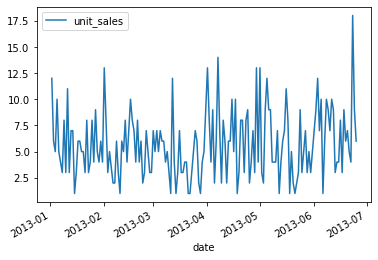

In [3]:
df.plot()

In [4]:
train = df.iloc[0:140]
test = df.iloc[140:]

In [6]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, typ = 'levels').rename("Predictions") 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [17]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [9]:
# Calculate root mean squared error 
rmse(test["unit_sales"], predictions) 

3.8184570669800597

In [10]:
# Calculate mean squared error 
mean_squared_error(test["unit_sales"], predictions) 

14.58061437236996

In [4]:
df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/TEST/S_3__I_123601.csv")

In [5]:
len(df)

175

In [6]:
error = pd.DataFrame(columns=['File_name','RMSE_ERROR','MSE','MAPE'])
x=0

In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ARIMA FORECAST


In [8]:
import os
paths_to_folders = ['C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__5']
import warnings
warnings.filterwarnings("ignore")
for folder in paths_to_folders:
   for csv_file in os.listdir(folder):
     df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__5/"+csv_file,parse_dates=['date'],index_col='date')
     #print(len(df.index))
     df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)
     #df=df[len(df)-600:len(df)-200]
     if len(df.index)>=100:
         i=int(len(df.index)*0.8)
         print(i)
         train = df.iloc[0:i]
         test = df.iloc[i:]
         model = SARIMAX(train['unit_sales'],  
                    order = (1, 1, 1),  
                    seasonal_order =(2, 1, 1, 12)) 

         result = model.fit() 
         start = len(train) 
         end = len(train) + len(test) - 1
         # Predictions for one-year against the test set 
         predictions = result.predict(start, end, typ = 'levels').rename("Predictions")
         error.loc[x, ['File_name']]=csv_file
         error.loc[x, ['RMSE_ERROR']]=np.sqrt(mean_squared_error(test["unit_sales"], predictions))
         error.loc[x, ['MSE']]=mean_squared_error(test["unit_sales"], predictions)
         error.loc[x, ['MAPE']]=mean_absolute_percentage_error(test["unit_sales"], predictions)
         x=x+1
         print(x)
         #print(csv_file)
         #print(rmse(test["unit_sales"], predictions))
         #print(mean_squared_error(test["unit_sales"], predictions))


92
1
120
2
116
3
116
4
94
5
84
6
89
7
81
8
88
9
92
10
124
11
131
12
88
13
113
14
112
15
82
16
104
17
84
18
137
19
136
20
139
21
80
22
100
23
139
24
136
25
121
26
136
27
137
28
128
29
126
30
129
31
80
32
118
33
117
34
133
35
133
36
91
37
119
38
138
39
136
40
139
41
137
42
139
43
112
44
86
45
113
46
116
47
114
48
104
49
100
50
124
51
112
52
134
53
130
54
131
55
121
56
125
57
139
58
139
59
138
60
139
61
131
62
139
63
127
64
104
65
139
66
139
67
138
68
129
69
138
70
134
71
128
72
123
73
123
74
139
75
88
76
132
77
96
78
124
79
124
80
120
81
137
82
124
83
131
84
139
85
98
86
99
87
137
88
130
89
134
90
102
91
101
92
128
93
118
94
98
95
88
96
131
97
87
98
139
99
135
100
125
101
100
102
139
103
138
104
112
105
88
106
138
107
112
108
130
109
116
110
122
111
138
112
122
113
134
114
132
115
130
116
134
117
124
118
81
119
87
120
128
121
133
122
103
123
120
124
113
125
136
126
127
127
137
128
119
129
93
130
132
131
135
132
129
133
125
134
139
135
116
136
139
137
107
138
124
139
88
140
95
141
123
142

1053
134
1054
122
1055
116
1056
103
1057
125
1058
136
1059
128
1060
118
1061
104
1062
129
1063
134
1064


In [9]:
len(error)

1064

In [11]:
error.to_csv('ARIMA_Forecast_Error_Store_5.csv')

In [10]:
error.head()

,File_name,RMSE_ERROR,MSE,MAPE
0,S_5__I_1001305.csv,1.47474,2.17487,80.7854
1,S_5__I_1003679.csv,9.64861,93.0956,280.96
2,S_5__I_1004550.csv,13.4241,180.207,250.585
3,S_5__I_1004551.csv,5.80517,33.7,171.485
4,S_5__I_1009539.csv,1.32861,1.76521,81.6074


In [71]:
error


,File_name,RMSE_ERROR,MSE,MAPE
0,S_1__I_159156.csv,12.5816,158.297,88.2929
1,S_1__I_311994.csv,6.55347,42.9479,23.9491
2,S_1__I_582864.csv,13.2409,175.321,47.7735
3,S_1__I_582865.csv,7.87316,61.9866,64.9189
4,S_1__I_584028.csv,17.7179,313.923,106.034
5,S_1__I_159156.csv,14.1708,200.811,78.351
6,S_1__I_311994.csv,5.26649,27.7359,21.2307
7,S_1__I_582864.csv,28.2728,799.351,69.1596
8,S_1__I_582865.csv,6.0922,37.1149,76.6878
9,S_1__I_584028.csv,19.2073,368.922,123.46


In [16]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [25]:
forecast1 = pd.DataFrame()

In [26]:
df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STEST/S_1__I_582865.csv",parse_dates=['date'],index_col='date')

In [27]:
 df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)


In [28]:
df=df[:300]

In [9]:
i=int(len(df.index)*0.6)
test = pd.DataFrame(df[:300])

In [10]:
test.tail()

,unit_sales
date,
2013-10-24,13.996
2013-10-25,15.341
2013-10-26,9.206
2013-10-27,12.771
2013-10-28,11.808


In [36]:
forecast1 = pd.DataFrame(columns=['date','actual_value'])

In [37]:
forecast1['date']=test.index
forecast1['actual_value']=np.array(test.unit_sales)

In [15]:
forecast1

,date,actual_value
0,2013-02-01,27.857
1,2013-03-01,3.759
2,2013-04-01,14.855
3,2013-05-01,16.124
4,2013-06-01,8.337
...,...,...
295,2013-10-24,13.996
296,2013-10-25,15.341
297,2013-10-26,9.206
298,2013-10-27,12.771


In [29]:
i=int(len(df.index)*0.8)
print(i)
train = df.iloc[0:i]
test = df.iloc[i:]

240


In [31]:
model = SARIMAX(train['unit_sales'],order = (1, 1, 1), seasonal_order =(1, 0, 1, 7)) 
result = model.fit() 
start = len(train) 
end = len(train) + len(test) - 1
pred=pd.DataFrame()
pred['forecast'] = result.predict(start, end)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will 

In [32]:
len(pred)

60

In [38]:
forecast1['arima']=np.array(pred['forecast'])

In [39]:
forecast1

,date,actual_value,arima
0,2013-08-30,15.812,13.403895
1,2013-08-31,16.496,14.804564
2,2013-01-09,6.776,7.621481
3,2013-02-09,12.563,14.118473
4,2013-03-09,15.451,12.903489
5,2013-04-09,16.976,14.850437
6,2013-05-09,8.755,12.059228
7,2013-06-09,14.820,13.573153
8,2013-07-09,15.363,14.810373
9,2013-08-09,7.108,7.629869


In [141]:
from fbprophet import Prophet

In [142]:
i=int(len(df.index)*0.6)
train = df.iloc[0:i]
test = df.iloc[i:]
         #print(len(train))
train['unit_sales'] = np.log(train['unit_sales'])
         # print(len(train))
train['ds'] = train.index
train['y']=df['unit_sales']
train.drop(['unit_sales'], axis=1,inplace=True)
m1 = Prophet(daily_seasonality=True,yearly_seasonality=False)
m1.fit(train)
future1 = m1.make_future_dataframe(periods=len(test.index),freq='D')
forecast2 = m1.predict(future1)
pred1=pd.DataFrame()
pred1=np.exp(forecast2[['yhat']])

In [143]:
pred1

,yhat
0,13.096526
1,11.293126
2,14.042307
3,13.452562
4,8.150438
...,...
1672,13.514572
1673,12.947000
1674,7.844142
1675,11.732503


In [144]:
forecast1['Prophet']=np.array(pred1.iloc[i:])

In [145]:
forecast1

,date,actual_value,arima,Prophet
0,2015-11-10,4.386,9.286938,11.027575
1,2015-12-10,10.317,12.393542,13.712123
2,2015-10-13,7.598,13.328851,13.136254
3,2015-10-14,15.872,14.079578,7.958804
4,2015-10-15,18.938,13.242960,11.904004
...,...,...,...,...
666,2017-11-08,4.777,13.003766,13.514572
667,2017-12-08,4.826,13.007185,12.947000
668,2017-08-13,6.288,13.009964,7.844142
669,2017-08-14,3.124,13.006864,11.732503


In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [51]:
#df=df[0:300]
k=int(len(df)*0.8)
train_data = df.iloc[:k]
test_data = df.iloc[k:]

In [52]:
y_hat_avg = test_data.copy()
fit1 = ExponentialSmoothing(np.asarray(train_data['unit_sales']) ,seasonal_periods=7,trend='add',damped=False ,seasonal='add').fit()
#y_hat_avg['Holt_Winter'] = fit1.forecast(len(test_data))
ypred=fit1.predict(k,len(df)-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [53]:
len(ypred)

60

In [54]:
ypred

array([13.40484756, 12.43431145,  5.13991748, 16.71320906, 13.21153852,
       14.09559907, 14.51302466, 13.42101868, 12.45048257,  5.1560886 ,
       16.72938018, 13.22770965, 14.11177019, 14.52919578, 13.4371898 ,
       12.4666537 ,  5.17225972, 16.7455513 , 13.24388077, 14.12794131,
       14.54536691, 13.45336092, 12.48282482,  5.18843084, 16.76172242,
       13.26005189, 14.14411243, 14.56153803, 13.46953205, 12.49899594,
        5.20460196, 16.77789354, 13.27622301, 14.16028355, 14.57770915,
       13.48570317, 12.51516706,  5.22077309, 16.79406467, 13.29239414,
       14.17645468, 14.59388027, 13.50187429, 12.53133818,  5.23694421,
       16.81023579, 13.30856526, 14.1926258 , 14.61005139, 13.51804541,
       12.54750931,  5.25311533, 16.82640691, 13.32473638, 14.20879692,
       14.62622252, 13.53421654, 12.56368043,  5.26928645, 16.84257803])

In [55]:
#forecast1['holt_winter']=np.array(ypred)

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from random import random
# contrived dataset
#data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(train_data)
model._index = train_data.index
model_fit = model.fit(smoothing_level=.3)
# make prediction
yhat = model_fit.predict(k,len(df)-1)
print(yhat)

2013-09-29    13.07365
2013-09-30    13.07365
2013-10-01    13.07365
2013-10-02    13.07365
2013-10-03    13.07365
2013-10-04    13.07365
2013-10-05    13.07365
2013-10-06    13.07365
2013-10-07    13.07365
2013-10-08    13.07365
2013-10-09    13.07365
2013-10-10    13.07365
2013-10-11    13.07365
2013-10-12    13.07365
2013-10-13    13.07365
2013-10-14    13.07365
2013-10-15    13.07365
2013-10-16    13.07365
2013-10-17    13.07365
2013-10-18    13.07365
2013-10-19    13.07365
2013-10-20    13.07365
2013-10-21    13.07365
2013-10-22    13.07365
2013-10-23    13.07365
2013-10-24    13.07365
2013-10-25    13.07365
2013-10-26    13.07365
2013-10-27    13.07365
2013-10-28    13.07365
2013-10-29    13.07365
2013-10-30    13.07365
2013-10-31    13.07365
2013-11-01    13.07365
2013-11-02    13.07365
2013-11-03    13.07365
2013-11-04    13.07365
2013-11-05    13.07365
2013-11-06    13.07365
2013-11-07    13.07365
2013-11-08    13.07365
2013-11-09    13.07365
2013-11-10    13.07365
2013-11-11 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [57]:
len(yhat)

60

In [58]:
forecast1['ses']=np.array(yhat)

In [40]:
test_data['Holt_winter']=np.array(ypred)

In [43]:
test_data.drop(columns=['predict'],inplace=True)

In [46]:
test_data.to_csv("Holt_winter_Forecast_Value.csv")

In [41]:
k=int(len(df.index)*0.8)
train_data = df.iloc[:k]
test_data = df.iloc[k:]

In [44]:
model = SARIMAX(train_data['unit_sales'], order=(1, 1, 1),seasonal_order=(0, 0, 7, 12), enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit(disp=False)
# make prediction
yhat= model_fit.predict(k,len(df)-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

No supported index is available. Prediction results will 

In [46]:
len(yhat)

60

In [47]:
forecast1['Sarima']=np.array(yhat)

In [63]:
forecast1=forecast1[20:]

In [64]:
forecast1

,date,actual_value,arima,Sarima,holt_winter,ses
20,2013-09-19,14.310,12.061370,12.043156,14.545367,13.07365
21,2013-09-20,20.102,13.570629,10.980478,13.453361,13.07365
22,2013-09-21,20.500,14.804036,11.768643,12.482825,13.07365
23,2013-09-22,4.624,7.645661,11.100570,5.188431,13.07365
24,2013-09-23,13.773,14.112195,17.501671,16.761722,13.07365
25,2013-09-24,11.822,12.902800,12.671033,13.260052,13.07365
26,2013-09-25,15.561,14.840753,12.485065,14.144112,13.07365
27,2013-09-26,11.520,12.062438,13.078445,14.561538,13.07365
28,2013-09-27,16.106,13.569369,11.441881,13.469532,13.07365
29,2013-09-28,14.261,14.800874,13.454904,12.498996,13.07365


In [65]:
forecast1.to_csv('Forecast_error_for_hybrid_merge2.csv')

In [155]:
forecast1.to_csv('TS_FORECAST_60%.csv')

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/STORE__3/S_3__I_105737.csv",parse_dates=['date'],index_col='date')
df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)

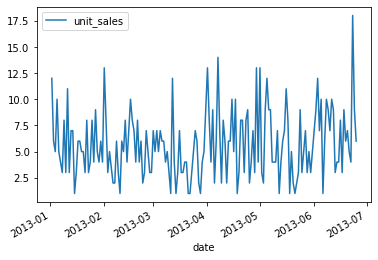

In [178]:
df.plot()
df_d=df

In [179]:
df.head()

,unit_sales
date,
2013-01-02,12
2013-01-03,6
2013-01-04,5
2013-01-05,10
2013-01-06,5


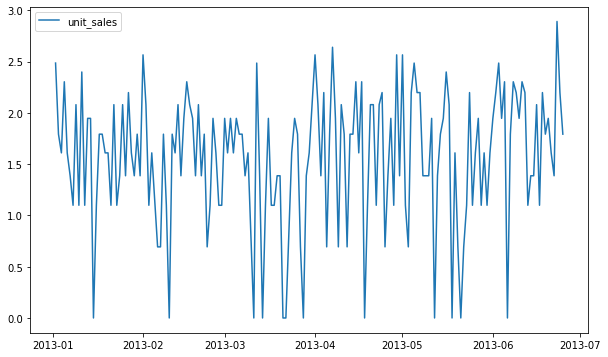

In [180]:
df['unit_sales'] = np.log(df['unit_sales'])
plt.figure(figsize=(10,6))
plt.plot(df)
plt.legend(['unit_sales'])

In [126]:
df.head()

,unit_sales
date,
2013-01-02,2.484907
2013-01-03,1.791759
2013-01-04,1.609438
2013-01-05,2.302585
2013-01-06,1.609438


In [182]:
df.head()

,ds,y
date,,
2013-01-02,2013-01-02,2.484907
2013-01-03,2013-01-03,1.791759
2013-01-04,2013-01-04,1.609438
2013-01-05,2013-01-05,2.302585
2013-01-06,2013-01-06,1.609438


In [205]:
train=df[0:141]
test=df[141:]

In [206]:
m1 = Prophet(daily_seasonality=True)
m1.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [207]:
future1 = m1.make_future_dataframe(periods=len(test))
forecast1 = m1.predict(future1)



In [208]:
len(forecast1)

171

In [209]:
pred=pd.DataFrame()
pred=forecast1[['yhat']]

In [210]:
pred=np.exp(forecast1[['yhat']])


In [211]:
pred.tail()

,yhat
166,3.939356
167,4.286773
168,4.072508
169,4.380088
170,3.857680


In [4]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

In [220]:
len(pred)
p=pred[141:]

In [236]:
from math import sqrt

rms=sqrt(mean_squared_error(np.array(test['y']),np.array(p)))


In [238]:
rms

2.3084560356758606

<function statsmodels.tools.eval_measures.rmse(x1, x2, axis=0)>

In [226]:
p=pd.DataFrame(p)

In [146]:
df.tail()

,unit_sales
date,
2013-06-21,5
2013-06-22,4
2013-06-23,18
2013-06-24,9
2013-06-25,6


In [76]:
df.dropna(inplace=True)

In [77]:
df.head()

,unit_sales
date,
2013-01-02,2.0
2013-01-03,2.0
2013-01-04,1.0
2013-01-06,3.0
2013-01-07,2.0


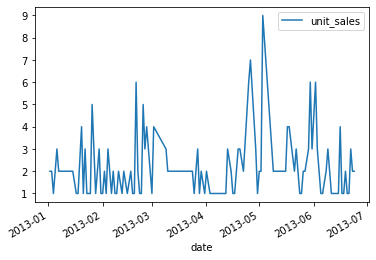

In [79]:
df['ds'] = df.index

In [86]:
len(df.index)

105

In [80]:
df.rename(columns={'ds':'ds','unit_sales':'y'},inplace=True)

In [81]:
new_df = df[['ds','y']]

In [88]:
m = Prophet()

In [89]:
m.fit(new_df[0:80])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
len(new_df)

105

In [90]:
future_dates = m.make_future_dataframe(periods=25)

In [91]:
prediction = m.predict(future_dates)

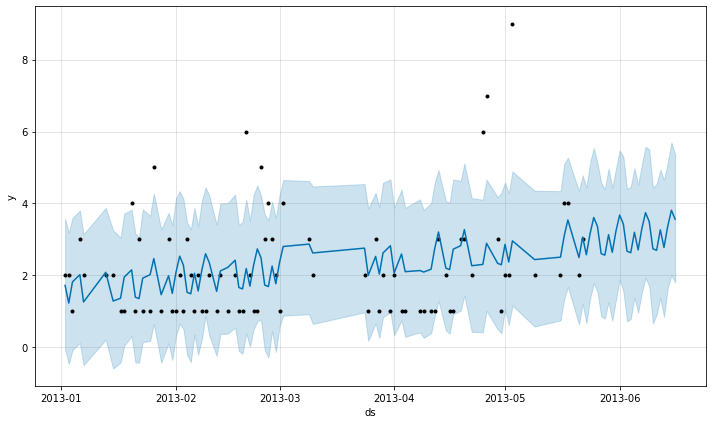

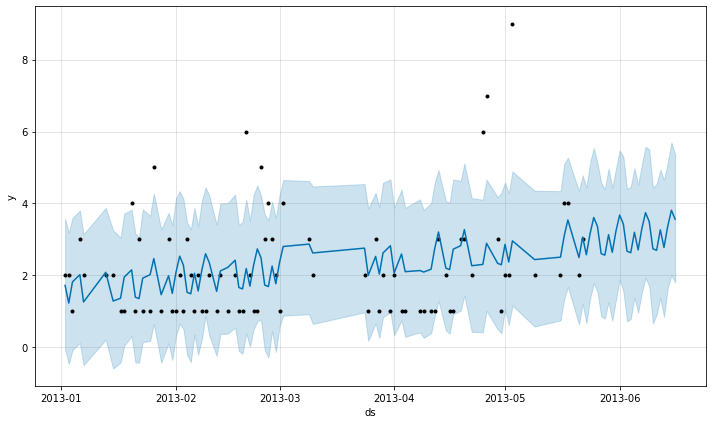

In [92]:
m.plot(prediction)

In [96]:
new_df.head(10)

,ds,y
date,,
2013-01-02,2013-01-02,2.0
2013-01-03,2013-01-03,2.0
2013-01-04,2013-01-04,1.0
2013-01-06,2013-01-06,3.0
2013-01-07,2013-01-07,2.0
2013-01-13,2013-01-13,2.0
2013-01-15,2013-01-15,2.0
2013-01-17,2013-01-17,1.0
2013-01-18,2013-01-18,1.0


In [41]:
df_pro.shape

(175, 2)

In [33]:
train=df[0:int(len(df.index)*0.8)]
train['ds'] = pd.to_datetime(train['date'])
train['y'] = train['unit_sales']
test=df[int(len(df.index)*0.8):]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


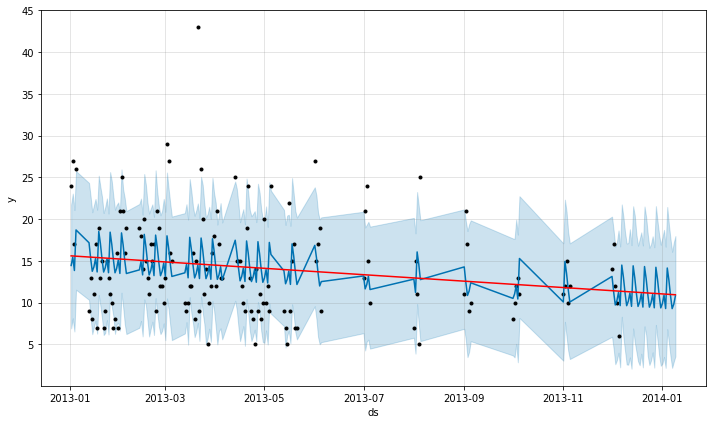

In [39]:
prophet = Prophet()
prophet.fit(train)
future = prophet.make_future_dataframe(periods=len(test), freq='D')
forecast1= prophet.predict(future)
fig = prophet.plot(forecast1)
#a = add_changepoints_to_plot(fig.gca(), prophet, forecast1)

In [31]:
error = pd.DataFrame(columns=['File_name','RMSE_ERROR','MSE','MAPE'])

# Forecasting Using prophet

In [29]:
import os
import logging, sys
logging.disable(sys.maxsize)
from math import sqrt
paths_to_folders = ['C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/TEST']
x=0
error = pd.DataFrame(columns=['File_name','RMSE_ERROR','MSE','MAPE'])
for folder in paths_to_folders:
   for csv_file in os.listdir(folder):
     df=pd.read_csv("C:/Users/RAHAT/Downloads/Untitled Folder/Sales_f/data/Splited Data s-1 to s-5/TEST/"+csv_file,parse_dates=['date'],index_col='date')
     #print(len(df.index))
     df.drop(['id','store_nbr','item_nbr','onpromotion'], axis=1,inplace=True)
     if len(df.index)>=100:
         i=int(len(df.index)*0.8)
         train = df.iloc[0:i]
         test = df.iloc[i:]
         #print(len(train))
         train['unit_sales'] = np.log(train['unit_sales'])
         # print(len(train))
         train['ds'] = train.index
         train['y']=df['unit_sales']
         train.drop(['unit_sales'], axis=1,inplace=True)
         m1 = Prophet(daily_seasonality=True)
         m1.fit(train)
         future1 = m1.make_future_dataframe(periods=len(test.index),freq='D')
         forecast1 = m1.predict(future1)
         pred=np.exp(forecast1[['yhat']])
         p=pred.iloc[i:]
         # print(len(pred))
         #rms=sqrt(mean_squared_error(test['unit_sales'],p))
         #print(rms)
         #print(mean_absolute_percentage_error(test["unit_sales"], p))
         error.loc[x, ['File_name']]=csv_file
         error.loc[x, ['RMSE_ERROR']]=sqrt(mean_squared_error(test['unit_sales'],p))
         error.loc[x, ['MSE']]=mean_squared_error(test['unit_sales'],p)
         error.loc[x, ['MAPE']]=mean_absolute_percentage_error(test["unit_sales"], p)
         x=x+1
         #print(csv_file)
         #print(rmse(test["unit_sales"], predictions))
         #print(mean_squared_error(test["unit_sales"], predictions))

In [30]:
error.head(4)

,File_name,RMSE_ERROR,MSE,MAPE
0,S_3__I_123601.csv,5.07905e+10,2.57967e+21,2.04976e+11
1,S_3__I_264452.csv,8.31546,69.1468,41.2268
2,S_4__I_168930.csv,7.12619,50.7826,46.8834
3,S_4__I_215352.csv,10.5699,111.723,71.5357


In [17]:
error.to_csv('prophet_forecast_error.csv')

In [ ]:
error.loc[x, ['File_name']]=csv_file
         error.loc[x, ['RMSE_ERROR']]=rmse(test["unit_sales"], predictions)
         error.loc[x, ['MSE']]=mean_squared_error(test["unit_sales"], predictions)
         error.loc[x, ['MAPE']]=mean_absolute_percentage_error(test["unit_sales"], predictions)
         x=x+1